## Challenge: Exercise 3
#### To plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.



In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

##### To obtain monthly number of searches for flights arriving at Malaga, Madrid or Barcelona

In [2]:
import bz2
files_path="/home/dsc/Repositories/Master-in-Data-Science/Data/"

In [3]:
searches_file = bz2.BZ2File(files_path+"searches.csv.bz2")
searches_df = pd.read_csv(searches_file, sep='^', usecols=['Destination','Date'])

# To create dataframe only with MAD-Madrid,BCN-Barcelona and AGP-Malaga and without Nan
searches_df = searches_df[searches_df['Destination'].isin(['MAD','BCN','AGP'])].dropna()

# To add a column with month of search
from dateutil.parser import parse
searches_df['Month'] = searches_df['Date'].apply(lambda d: parse(d).month)
searches_df.sample(6)

,Date,Destination,Month
11188946,2013-03-01,MAD,3
12176313,2013-11-26,MAD,11
1497661,2013-03-03,BCN,3
19247872,2013-08-09,BCN,8
12441516,2013-08-24,MAD,8
4623407,2013-11-12,MAD,11


In [4]:
# Finally, grouping and pivoting dataframe
searches_gr = searches_df.groupby(['Destination','Month'])
final_df = searches_gr.count().reset_index()
final_df = final_df.pivot(index='Month', columns='Destination', values='Date')
final_df

Destination,AGP,BCN,MAD
Month,,,
1,9633,29469,24258
2,8379,28329,22800
3,10659,30552,24681
4,8265,31236,25251
5,10830,28728,26334
6,7923,26505,22800
7,8892,29241,22971
8,7866,27075,21831
9,8151,23427,21147


##### To plot results for the three airports in the same figure

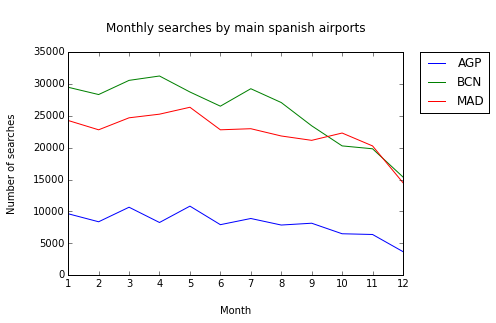

In [5]:
final_df.plot()
plt.xticks(final_df.index)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nMonthly searches by main spanish airports\n")
plt.xlabel("\nMonth")
plt.ylabel("Number of searches\n")
plt.show()